
# **NOTEBOOK EDA POWERLIFTING**
***

#### Importamos las librerías y el dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [2]:
df_power = pd.read_csv("../data/raw/openpowerlifting-2023-12-16-fb2308df.csv")

C:\Users\enrik\AppData\Local\Temp\ipykernel_23824\499287465.py:1: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df_power = pd.read_csv("../data/raw/openpowerlifting-2023-12-16-fb2308df.csv")


###

#### Creamos una copia para trabajar sobre el, empezamos a limpiar datos

In [3]:
df_p= df_power.copy()


Miramos cuantos nulos contiene este dataset para poder limpiarlo. Es importante saber que los nulos son datos faltantes y no levantamientos fallidos, ya que los levantantamientos fallidos se muestran en negativo.  Pero antes como los nulos de competición están en negativo los paso a 0

In [4]:
df_p.isnull().sum()



Name                      0
Sex                       0
Event                     0
Equipment                 0
Age                 1068877
AgeClass             812888
BirthYearClass       999143
Division               1430
BodyweightKg          38253
WeightClassKg         40457
Squat1Kg            2133516
Squat2Kg            2142709
Squat3Kg            2166469
Squat4Kg            3021765
Best3SquatKg        1005890
Bench1Kg            1649874
Bench2Kg            1665411
Bench3Kg            1707576
Bench4Kg            3009241
Best3BenchKg         357071
Deadlift1Kg         2017999
Deadlift2Kg         2035584
Deadlift3Kg         2075960
Deadlift4Kg         3007301
Best3DeadliftKg      834219
TotalKg              201861
Place                     0
Dots                 226758
Wilks                226758
Glossbrenner         226758
Goodlift             474756
Tested               799386
Country             1280327
State               2399675
Federation                0
ParentFederation    

Reemplazo los valores negativos con un 0, ya que si no los valores nos darán erroneos con los números en negativo.

In [5]:
cols_to_convert = ['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']

df_p[cols_to_convert] = df_p[cols_to_convert].apply(pd.to_numeric, errors='coerce') # Convertir las columnas seleccionadas a tipo numérico

for col in cols_to_convert:
    df_p[col] = df_p[col].apply(lambda x: max(0, x)) # Reemplazar los valores negativos con cero

Comprobamos los NaN

In [6]:
age_nan = df_p["Age"].isna() #nos da el nan de las columnas elegidas
ageclass_nan= df_p["AgeClass"].isna()
country_nan = df_p["Country"].isna()
df_p.loc[age_nan & ageclass_nan & country_nan]

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
363,Alex Isaias Laguna Mantazole,M,B,Raw,NaN,NaN,NaN,MO,56.0,56,...,NaN,NaN,NaN,CONBRAP,GPC,2017-05-13,Brazil,NaN,Anhembi,Campeonato Paulista de Supino e Lev.Terra
365,Jaider Ramos,M,B,Raw,NaN,NaN,NaN,MO,75.0,75,...,NaN,NaN,NaN,CONBRAP,GPC,2017-05-13,Brazil,NaN,Anhembi,Campeonato Paulista de Supino e Lev.Terra
367,Diego Luiz de Almeida Bento,M,B,Raw,NaN,NaN,NaN,MO,75.0,75,...,NaN,NaN,NaN,CONBRAP,GPC,2017-05-13,Brazil,NaN,Anhembi,Campeonato Paulista de Supino e Lev.Terra
370,Anderson Genuíno dos Reis,M,B,Raw,NaN,NaN,NaN,MO,82.5,82.5,...,NaN,NaN,NaN,CONBRAP,GPC,2017-05-13,Brazil,NaN,Anhembi,Campeonato Paulista de Supino e Lev.Terra
371,Hilton M. Otaviano,M,B,Raw,NaN,NaN,NaN,MO,82.5,82.5,...,NaN,NaN,NaN,CONBRAP,GPC,2017-05-13,Brazil,NaN,Anhembi,Campeonato Paulista de Supino e Lev.Terra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998996,Ray Neeley,M,SBD,Single-ply,NaN,NaN,NaN,Open,75.0,75,...,Yes,NaN,NaN,IPF,IPF,1981-07-25,USA,CA,Santa Clara,World Games
2999001,James Cash,M,SBD,Single-ply,NaN,NaN,NaN,Open,100.0,100,...,Yes,NaN,NaN,IPF,IPF,1981-07-25,USA,CA,Santa Clara,World Games
2999003,Scott Palmer,M,SBD,Single-ply,NaN,NaN,NaN,Open,110.0,110,...,Yes,NaN,NaN,IPF,IPF,1981-07-25,USA,CA,Santa Clara,World Games
2999006,Dave Shaw,M,SBD,Single-ply,NaN,NaN,NaN,Open,NaN,125+,...,Yes,NaN,NaN,IPF,IPF,1981-07-25,USA,CA,Santa Clara,World Games


Pongo los valores nulos de los levantamientos (squat, deadlift, bench, goodlift y wilks) en valores 0, ya que algunas federaciones solo ponen los levantamientos relevantes o el resultado final. Y en otras,pongo la media.

In [7]:

levantamientos_cols = ['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Goodlift', 'Wilks']


df_p[levantamientos_cols] = df_p[levantamientos_cols].fillna(0)

Luego los relleno con la moda

In [8]:
modes = df_p[['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']].mode().iloc[0]
df_p[['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']] = df_p[['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']].replace(0, np.nan).fillna(modes)


In [9]:
columns_replace_mode = ['Sex','TotalKg', 'Event', 'Equipment', 'Age', 'AgeClass', 'Division', 'BodyweightKg', 'WeightClassKg', 'Place', 'Country', 'Federation', 'Date', 'MeetTown', 'MeetName']

for column in columns_replace_mode:
    df_p[column].fillna(df_p[column].mode()[0], inplace=True)


De vez en cuando voy comprobando columnas, para ver las que tengo para trabajar y cuales tengo que eliminar.

In [10]:
df_p.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass',
       'BirthYearClass', 'Division', 'BodyweightKg', 'WeightClassKg',
       'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg',
       'Best3DeadliftKg', 'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner',
       'Goodlift', 'Tested', 'Country', 'State', 'Federation',
       'ParentFederation', 'Date', 'MeetCountry', 'MeetState', 'MeetTown',
       'MeetName'],
      dtype='object')

Rellenamos columnas faltantes con la moda

In [11]:
df_p.loc[df_p["Country"].isna(),"Country"] = df_p["Country"].mode().values[0]

Compruebo el Nan de las columnas en las cuales me quedaban dudas

In [12]:
age_nan = df_p["Age"].isna() #nos da el nan de las olumnas elegidas
ageclass_nan= df_p["AgeClass"].isna()
country_nan = df_p["Country"].isna()
df_p.loc[age_nan & ageclass_nan & country_nan]

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName


Elimino filas con Nan y columas

In [132]:
df_p.dropna(axis = "index", inplace = True) 
df_p.drop(columns = 'MeetTown', inplace = True)

Elimino las columnas que no voy a utilizar

In [13]:
eliminated_col = ['Bench4Kg','Deadlift4Kg', 'Squat4Kg','MeetState', 'Best3SquatKg','Best3BenchKg','Best3DeadliftKg', 'Glossbrenner', 'Tested', 'MeetCountry', 'Wilks','ParentFederation', 'State','Dots', 'BirthYearClass', ]

df_p.drop(columns = eliminated_col, inplace = True)

Aquí tuve que comprobar si algunas de las columnas seguían teniendo nulos

In [14]:
null_counts = df_p.isnull().sum()
null_counts


Name             0
Sex              0
Event            0
Equipment        0
Age              0
AgeClass         0
Division         0
BodyweightKg     0
WeightClassKg    0
Squat1Kg         0
Squat2Kg         0
Squat3Kg         0
Bench1Kg         0
Bench2Kg         0
Bench3Kg         0
Deadlift1Kg      0
Deadlift2Kg      0
Deadlift3Kg      0
TotalKg          0
Place            0
Goodlift         0
Country          0
Federation       0
Date             0
MeetTown         0
MeetName         0
dtype: int64

Compruebo las columnas de nuevo, para ver datos relevantes para el posible análisis. Es posible que tenga que eliminar columnas que luego no encuentre utilidad en sus datos.


In [15]:
df_p.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass', 'Division',
       'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg',
       'Deadlift3Kg', 'TotalKg', 'Place', 'Goodlift', 'Country', 'Federation',
       'Date', 'MeetTown', 'MeetName'],
      dtype='object')

Hay muchos valores 0, por lo que calculo la moda para darle valor a los datos

In [17]:
modes = df_p[['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']].mode().iloc[0]
df_p[['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']] = df_p[['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']].replace(0, modes)


Paso las fechas a datetime

In [18]:
df_p['Date'] = pd.to_datetime(df_p['Date'])

Ahora, teniendo el dataset limpio para analizar las preguntas, empezamos el análisis de datos

## ANÁLISIS DEL DATASET
---

En esta parte es muy importante hacerse preguntas para poder obtener respuestas y poder representarla en gráficos.
 
-El que tiene más puntuación en Goodlifts, no es necesariamente el más fuerte en todas las marcas.

-¿Hay una mejora en marcas a lo largo de los años desde que tenemos información? A medida que pasan los años, los jóvenes destacan más con sus marcas?

-¿Es relevante la edad del sujeto en este deporte? 

-En relación peso corporal, ¿Hay mucha diferencia entre marcas de una categoría de peso a otra? Es decir, cuantas veces levanta su propio peso. 

Lo primero que hago es comporbar columnas para ver que quiero incluir en el EDA

In [19]:
df_dl = df_p[['Name', 'Goodlift', 'TotalKg', 'Country','Place',  'AgeClass', 'Division', 'Age', 'Federation',]].head(10)
df_dl

,Name,Goodlift,TotalKg,Country,Place,AgeClass,Division,Age,Federation
0,Alona Vladi,57.10,247.5,Russia,1,24-34,O,33.0,GFP
1,Galina Solovyanova,56.76,282.5,Russia,1,40-44,M1,43.0,GFP
2,Daniil Voronin,41.24,267.5,Russia,1,16-17,T,15.5,GFP
3,Aleksey Krasov,66.68,430.0,Russia,1,35-39,O,35.0,GFP
4,Margarita Pleschenkova,39.34,265.0,Russia,1,24-34,O,26.5,GFP
5,Sergey Timoshenko,39.09,275.0,Russia,1,16-17,T,15.5,GFP
6,Vladimir Karavaev,47.35,335.0,Russia,1,55-59,M2,57.5,GFP
7,Tatyana Altunina,51.79,287.5,Russia,1,24-34,O,26.0,GFP
8,Ruslan Gasanov,81.45,652.5,Russia,1,24-34,O,31.5,GFP
9,Ekaterina Glukhova,51.38,212.5,Russia,1,24-34,O,25.5,GFP


Aquí comporuebo los competidores de la categoría en la que nos centraremos.

In [20]:
competidores_open = df_p[df_p['Division'] == 'Open']
competidores_open

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Deadlift2Kg,Deadlift3Kg,TotalKg,Place,Goodlift,Country,Federation,Date,MeetTown,MeetName
2233,Oliver Apfelthaler,M,SBD,Wraps,25.0,24-34,Open,80.30,82.5,170.0,...,235.0,0.0,535.0,1,75.31,Austria,WUAP-AUT,2021-08-28,Bruck an der Leitha,Österreichische Staatsmeisterschaft & Internat...
2234,Simon Brandstetter,M,SBD,Wraps,31.0,24-34,Open,81.30,82.5,137.0,...,0.0,0.0,390.0,2,54.56,Austria,WUAP-AUT,2021-08-28,Bruck an der Leitha,Österreichische Staatsmeisterschaft & Internat...
2235,Erik Valent,M,SBD,Multi-ply,37.0,35-39,Open,78.80,82.5,200.0,...,220.0,245.0,700.0,1,83.38,Slovakia,WUAP-AUT,2021-08-28,Bruck an der Leitha,Österreichische Staatsmeisterschaft & Internat...
2239,Fabian Senftner,M,SBD,Wraps,22.0,20-23,Open,93.00,100,245.0,...,280.0,300.0,727.5,1,95.17,Austria,WUAP-AUT,2021-08-28,Bruck an der Leitha,Österreichische Staatsmeisterschaft & Internat...
2240,Marcus Topf,M,SBD,Wraps,29.0,24-34,Open,98.80,100,220.0,...,285.0,0.0,707.5,2,89.89,Austria,WUAP-AUT,2021-08-28,Bruck an der Leitha,Österreichische Staatsmeisterschaft & Internat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030197,Inna Orobets,F,SBD,Single-ply,45.0,45-49,Open,109.30,84+,235.0,...,210.0,215.0,645.0,3,93.16,Ukraine,IPF,2016-11-14,Orlando,World Open Championships
3030198,Ágnes Szabó,F,SBD,Single-ply,27.5,24-34,Open,113.22,84+,0.0,...,200.0,0.0,632.5,4,90.57,Hungary,IPF,2016-11-14,Orlando,World Open Championships
3030199,Brenda van der Meulen,F,SBD,Single-ply,37.5,35-39,Open,110.79,84+,210.0,...,190.0,0.0,617.5,5,88.89,Netherlands,IPF,2016-11-14,Orlando,World Open Championships
3030200,Kelly Phasey,F,SBD,Single-ply,39.5,35-39,Open,124.53,84+,210.0,...,0.0,0.0,515.0,6,72.24,England,IPF,2016-11-14,Orlando,World Open Championships


Para comprobar datos de algún atleta específico

In [21]:
#mirar por nombre
name = 'Rae-Ann Miller'
filtered_rows = df_p[df_p['Name'].str.contains(name, na=True)]

filtered_rows

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Deadlift2Kg,Deadlift3Kg,TotalKg,Place,Goodlift,Country,Federation,Date,MeetTown,MeetName
315869,Rae-Ann Miller,F,SBD,Multi-ply,42.0,40-44,Pro,98.34,90+,0.0,...,0.0,0.0,725.75,1,107.99,USA,XPC,2018-03-02,Columbus,Finals
322112,Rae-Ann Miller,F,B,Multi-ply,41.0,40-44,Pro Open,100.61,90+,0.0,...,0.0,0.0,229.06,1,112.71,USA,XPS,2017-02-18,Syracuse,Iron Asylum Full Power Meet
322180,Rae-Ann Miller,F,SBD,Multi-ply,43.0,40-44,Pro Open,97.70,90+,0.0,...,0.0,0.0,150.00,DQ,0.00,USA,XPS,2019-11-16,Syracuse,Beasts of NY
322996,Rae-Ann Miller,F,B,Single-ply,41.0,40-44,Open,98.97,90+,0.0,...,0.0,0.0,226.80,1,112.10,USA,XPS,2017-10-21,Syracuse,Iron Maiden Women's Pro/Am
323041,Rae-Ann Miller,F,B,Unlimited,47.0,45-49,Pro Open,103.87,110,0.0,...,0.0,0.0,299.37,1,146.09,USA,XPS,2023-11-04,Salamanca,War for the Sword
323422,Rae-Ann Miller,F,B,Unlimited,46.0,45-49,Open,108.41,110,0.0,...,0.0,0.0,285.76,1,138.02,USA,XPS,2022-09-24,Syracuse,F8 NorthEast Bench Invitational
744694,Rae-Ann Miller,F,B,Unlimited,46.0,45-49,Pro Open,108.41,110,0.0,...,0.0,0.0,281.00,1,135.73,USA,MM,2022-05-21,Youngstown,Nationals
745194,Rae-Ann Miller,F,B,Unlimited,45.0,45-49,Pro Open,106.59,90+,0.0,...,0.0,0.0,258.55,1,125.37,USA,MM,2021-04-10,Glens Falls,Power Wars
745647,Rae-Ann Miller,F,B,Unlimited,45.0,45-49,Pro Open,102.51,90+,0.0,...,0.0,0.0,274.42,1,134.36,USA,MM,2021-07-17,Erie,814 Summer Smackdown Invitational
746181,Rae-Ann Miller,F,B,Unlimited,47.0,45-49,Pro Open,107.95,110,0.0,...,0.0,0.0,294.84,1,142.55,USA,MM,2023-02-04,Celina,Bench for Wolfe II


Para responder la primera pregunta ('El que tiene más puntuación en Goodlifts, no es necesariamente el más fuerte en todas las marcas'), empiezo  a sacar información relevante de los atletas más fuertes.


In [22]:
top_men = df_p[df_p['Sex'] == 'M'].nlargest(28, 'Goodlift')
top_men['Event'] = 'SBD'

top_men = top_men.drop_duplicates(subset='Name', keep='first') # Eliminar duplicados 

print("Top 10 Hombres con Goodlift más alto:")
top_men[['Name', 'Goodlift', 'Event']]

Top 10 Hombres con Goodlift más alto:


,Name,Goodlift,Event
1003446,Jimmy Kolb,176.13,SBD
1002288,Greg Powell,157.18,SBD
745392,Rob Forell,153.16,SBD
94691,Doug Smithey,145.57,SBD
1001554,Rich Putnam,145.30,SBD
322055,Bob Merkh,145.20,SBD
549426,Tony Carlino,143.51,SBD
92678,Bill Gillespie,142.64,SBD
1002063,Tiny Meeker,142.27,SBD
310352,Kalle Ylitalo-James,142.12,SBD


In [23]:
top_women = df_p[df_p['Sex'] == 'F'].nlargest(10, 'Goodlift')

top_women['Event'] = 'SBD'


print("Top 10 Mujeres con Goodlift más alto:")
top_women[['Name', 'Goodlift', 'Event']]

Top 10 Mujeres con Goodlift más alto:


,Name,Goodlift,Event
2974773,Ekaterina Zaytseva,155.12,SBD
2509883,Ashleigh Hoeta,153.01,SBD
1010363,Katrina Bielomyza,146.59,SBD
984056,Lucy Ogechukwu Ejike,146.49,SBD
323041,Rae-Ann Miller,146.09,SBD
1755602,Marianna Gasparyan,145.62,SBD
2303600,April Mathis,145.50,SBD
1756719,Kristy Hawkins,144.79,SBD
985670,Lucy Ihuoma,144.42,SBD
986193,Esther Osa Oyema,144.30,SBD


Para completar datos, tuve que buscar los datos de atletas que podían salir en el ranking de goodlifts(Tuve que reiniciar la copia del dataset, ya que había eliminado datos importantes)

In [24]:
index_of_natalie_do = df_power[df_p['Name'] == 'Natalie Do'].index[0]

df_p.loc[index_of_natalie_do, 'Squat1Kg'] = 115.0
df_p.loc[index_of_natalie_do, 'Squat2Kg'] = 122.5
df_p.loc[index_of_natalie_do, 'Squat3Kg'] = 127.5
df_p.loc[index_of_natalie_do, 'Bench1Kg'] = 60.0
df_p.loc[index_of_natalie_do, 'Bench2Kg'] = 62.5
df_p.loc[index_of_natalie_do, 'Bench3Kg'] = 67.5
df_p.loc[index_of_natalie_do, 'Deadlift1Kg'] = 160.0
df_p.loc[index_of_natalie_do, 'Deadlift2Kg'] = 168.0
df_p.loc[index_of_natalie_do, 'Deadlift3Kg'] = -172.5



Compruebo las mujeres al igual que los hombres con más goodlifts

Empiezo a sacar gráficas de datos relevantes

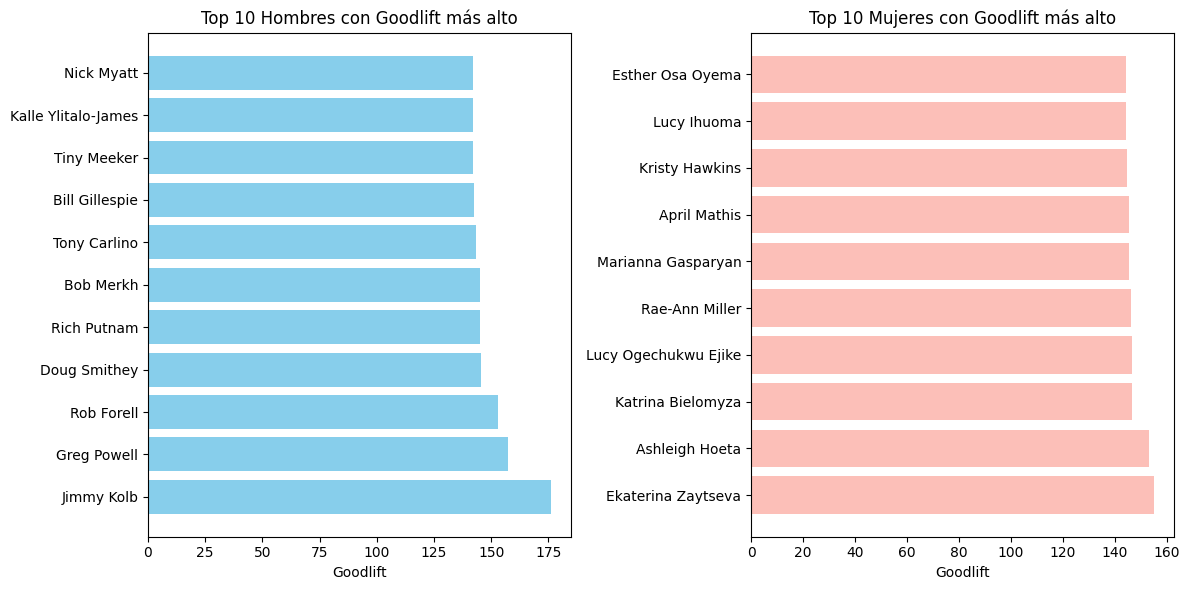

In [25]:
plt.figure(figsize=(12, 6)) #utilizo el top men y women anterior

plt.subplot(1, 2, 1)
plt.barh(top_men['Name'], top_men['Goodlift'], color='skyblue')
plt.xlabel('Goodlift')
plt.title('Top 10 Hombres con Goodlift más alto')

plt.subplot(1, 2, 2)
plt.barh(top_women['Name'], top_women['Goodlift'], color='salmon', alpha = 0.5)
plt.xlabel('Goodlift')
plt.title('Top 10 Mujeres con Goodlift más alto')

plt.tight_layout()
plt.show()

Aquí ya empezamos a ver como según talla, sexo y peso hay atletas que destacan.

### El que tiene más puntuación en Goodlifts, no es necesariamente el más fuerte en todas las marcas.

Empezamos a comprobar datos:

In [26]:
top_women = df_p[(df_p['Sex'] == 'F')].nlargest(10, 'Goodlift')
top_women

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Deadlift2Kg,Deadlift3Kg,TotalKg,Place,Goodlift,Country,Federation,Date,MeetTown,MeetName
2974773,Ekaterina Zaytseva,F,B,Multi-ply,36.0,35-39,Pro Submasters 33-39,82.50,82.5,0.0,...,0.0,0.0,295.00,1,155.12,Russia,NAP,2023-09-23,Ekaterinburg,Golden Tiger XVII'
2509883,Ashleigh Hoeta,F,B,Unlimited,27.0,24-34,Open,109.50,110,0.0,...,0.0,0.0,317.50,1,153.01,New Zealand,IPL-NZ,2023-11-25,Papakura,Tombstone
1010363,Katrina Bielomyza,F,B,Unlimited,43.0,40-44,Pro Open,96.98,100,0.0,...,0.0,0.0,294.84,1,146.59,USA,IPA,2023-05-20,Bridgeport,Hellbent Barbell Meet
984056,Lucy Ogechukwu Ejike,F,B,Raw,26.0,24-34,Open,44.00,44,0.0,...,0.0,0.0,127.50,1,146.49,Nigeria,WPPO,2004-09-20,Athens,Paralympic Games
323041,Rae-Ann Miller,F,B,Unlimited,47.0,45-49,Pro Open,103.87,110,0.0,...,0.0,0.0,299.37,1,146.09,USA,XPS,2023-11-04,Salamanca,War for the Sword
1755602,Marianna Gasparyan,F,SBD,Wraps,30.0,24-34,Open,56.00,56,245.0,...,215.0,220.0,612.50,1,145.62,USA,WRPF,2019-04-27,Del Mar,Kern US Open
2303600,April Mathis,F,B,Raw,28.0,24-34,Pro Open,120.20,110+,0.0,...,0.0,0.0,205.00,1,145.50,USA,RPS,2016-05-28,Fort Myers,Redemption III
1756719,Kristy Hawkins,F,SBD,Wraps,43.0,40-44,Open,74.00,75,285.0,...,0.0,0.0,725.00,1,144.79,USA,WRPF,2023-10-28,Manassas,The American Pro 2
985670,Lucy Ihuoma,F,B,Raw,22.0,20-23,Open,38.10,40,0.0,...,0.0,0.0,100.00,1,144.42,USA,WPPO,2007-02-09,Ibadan,1st All Africa Games
986193,Esther Osa Oyema,F,B,Raw,28.0,24-34,Open,46.65,48,0.0,...,0.0,0.0,135.00,1,144.30,Nigeria,WPPO,2010-10-12,Delhi,Commonwealth Games


In [27]:
df_p.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass', 'Division',
       'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg',
       'Deadlift3Kg', 'TotalKg', 'Place', 'Goodlift', 'Country', 'Federation',
       'Date', 'MeetTown', 'MeetName'],
      dtype='object')

Aquí selecciono las columnas a las que quiero añadir la media de ciertas marcas, ya que el dataset estaba lleno de valores nulos y de negativos

In [29]:
columns_to_fill = ['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']

# Calcular la media de cada columna y reemplazar los valores 0 por esa media
for column in columns_to_fill:
    mean_value = df_p[df_p[column] != 0][column].mean()  # Calcula la media excluyendo los valores 0
    df_p[column] = df_p[column].replace(0, mean_value)  # Reemplaza los valores 0 por la media calculada


In [279]:
df_p['Squat2Kg'].mean() #comprobar que todo haya salido correcto

170.11722298964636

Compruebo algunos atletas relevantes o duplicados

In [30]:

name = 'Rae-Ann Miller'
filtered_rows = df_p[df_p['Name'].str.contains(name, na=True)]

filtered_rows

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Deadlift2Kg,Deadlift3Kg,TotalKg,Place,Goodlift,Country,Federation,Date,MeetTown,MeetName
315869,Rae-Ann Miller,F,SBD,Multi-ply,42.0,40-44,Pro,98.34,90+,164.731425,...,192.163815,192.744566,725.75,1,107.99,USA,XPC,2018-03-02,Columbus,Finals
322112,Rae-Ann Miller,F,B,Multi-ply,41.0,40-44,Pro Open,100.61,90+,164.731425,...,192.163815,192.744566,229.06,1,112.71,USA,XPS,2017-02-18,Syracuse,Iron Asylum Full Power Meet
322180,Rae-Ann Miller,F,SBD,Multi-ply,43.0,40-44,Pro Open,97.70,90+,164.731425,...,192.163815,192.744566,150.00,DQ,0.00,USA,XPS,2019-11-16,Syracuse,Beasts of NY
322996,Rae-Ann Miller,F,B,Single-ply,41.0,40-44,Open,98.97,90+,164.731425,...,192.163815,192.744566,226.80,1,112.10,USA,XPS,2017-10-21,Syracuse,Iron Maiden Women's Pro/Am
323041,Rae-Ann Miller,F,B,Unlimited,47.0,45-49,Pro Open,103.87,110,164.731425,...,192.163815,192.744566,299.37,1,146.09,USA,XPS,2023-11-04,Salamanca,War for the Sword
323422,Rae-Ann Miller,F,B,Unlimited,46.0,45-49,Open,108.41,110,164.731425,...,192.163815,192.744566,285.76,1,138.02,USA,XPS,2022-09-24,Syracuse,F8 NorthEast Bench Invitational
744694,Rae-Ann Miller,F,B,Unlimited,46.0,45-49,Pro Open,108.41,110,164.731425,...,192.163815,192.744566,281.00,1,135.73,USA,MM,2022-05-21,Youngstown,Nationals
745194,Rae-Ann Miller,F,B,Unlimited,45.0,45-49,Pro Open,106.59,90+,164.731425,...,192.163815,192.744566,258.55,1,125.37,USA,MM,2021-04-10,Glens Falls,Power Wars
745647,Rae-Ann Miller,F,B,Unlimited,45.0,45-49,Pro Open,102.51,90+,164.731425,...,192.163815,192.744566,274.42,1,134.36,USA,MM,2021-07-17,Erie,814 Summer Smackdown Invitational
746181,Rae-Ann Miller,F,B,Unlimited,47.0,45-49,Pro Open,107.95,110,164.731425,...,192.163815,192.744566,294.84,1,142.55,USA,MM,2023-02-04,Celina,Bench for Wolfe II


Aquí saco una gráfica que compara los Godlifts y los tres movimientos en atletas masculinos y femeninos

C:\Users\enrik\AppData\Local\Temp\ipykernel_23824\1216859938.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_power_lifts['Squat_max'] = df_power_lifts[['Squat1Kg', 'Squat2Kg', 'Squat3Kg']].max(axis=1) # Obtener el valor máximo de los tres intentos de squat, bench y deadlift
C:\Users\enrik\AppData\Local\Temp\ipykernel_23824\1216859938.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_power_lifts['Bench_max'] = df_power_lifts[['Bench1Kg', 'Bench2Kg', 'Bench3Kg']].max(axis=1)
C:\Users\enrik\AppData

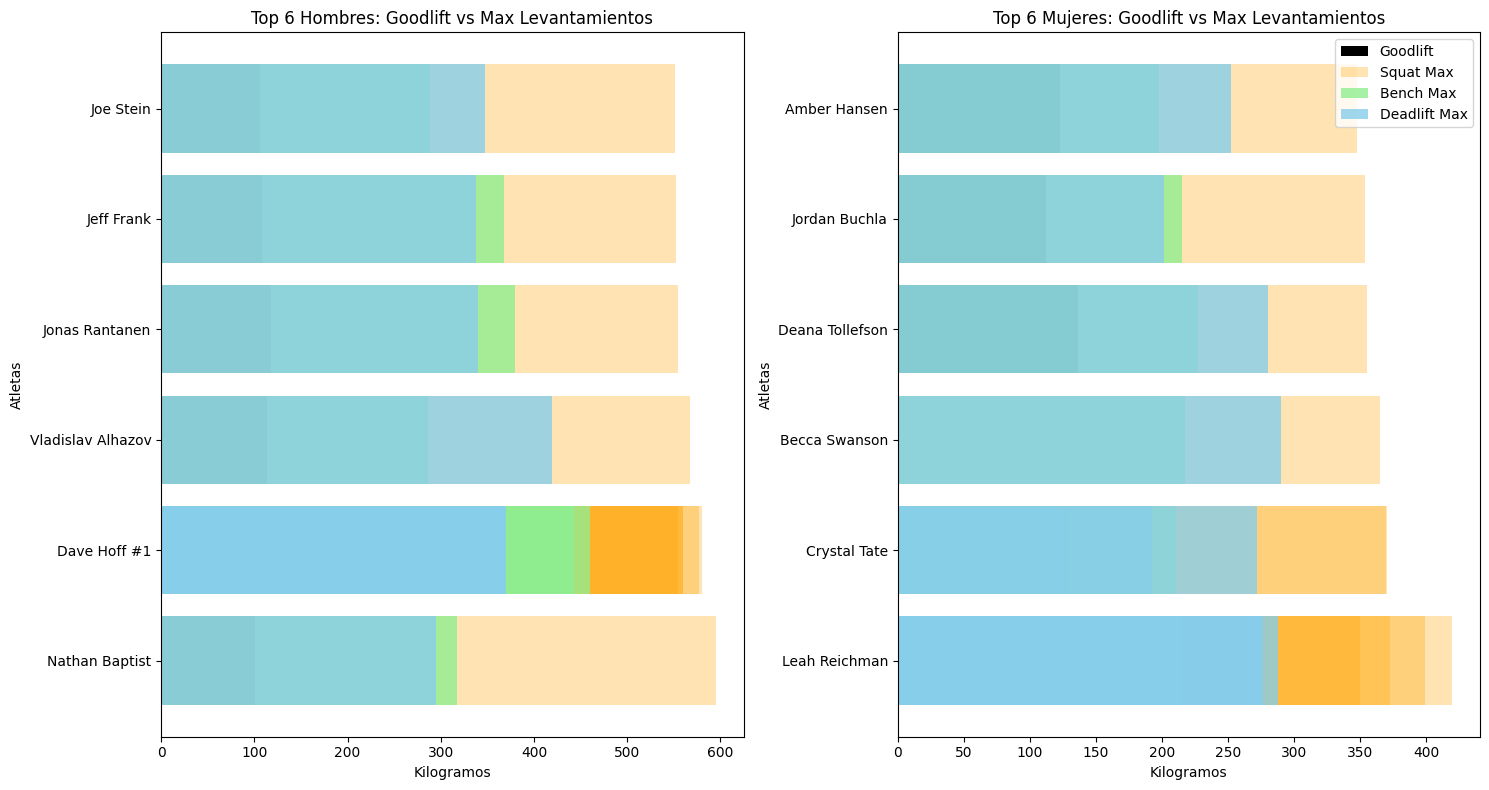

In [31]:
columns_to_keep = ['Name', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
                   'Bench1Kg', 'Bench2Kg', 'Bench3Kg',
                   'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Goodlift', 'Sex']

df_power_lifts = df_p[columns_to_keep]

df_power_lifts['Squat_max'] = df_power_lifts[['Squat1Kg', 'Squat2Kg', 'Squat3Kg']].max(axis=1) # Obtener el valor máximo de los tres intentos de squat, bench y deadlift
df_power_lifts['Bench_max'] = df_power_lifts[['Bench1Kg', 'Bench2Kg', 'Bench3Kg']].max(axis=1)
df_power_lifts['Deadlift_max'] = df_power_lifts[['Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']].max(axis=1)


top_men = df_power_lifts[df_power_lifts['Sex'] == 'M'].nlargest(10, ['Squat_max', 'Bench_max', 'Deadlift_max']) # Filtrar y obtener los atletas con los máximos levantamientos de cada sexo.
top_women = df_power_lifts[df_power_lifts['Sex'] == 'F'].nlargest(10, ['Squat_max', 'Bench_max', 'Deadlift_max'])


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

axs[0].barh(top_men['Name'], top_men['Goodlift'], color='purple', label='Goodlift')
axs[0].barh(top_men['Name'], top_men['Squat_max'], color='orange', alpha=0.3, label='Squat Max')
axs[0].barh(top_men['Name'], top_men['Bench_max'], color='lightgreen', alpha=0.8, label='Bench Max')
axs[0].barh(top_men['Name'], top_men['Deadlift_max'], color='skyblue', alpha=0.8, label='Deadlift Max')
axs[0].set_ylabel('Atletas')
axs[0].set_xlabel('Kilogramos')
axs[0].set_title('Top 6 Hombres: Goodlift vs Max Levantamientos')

axs[1].barh(top_women['Name'], top_women['Goodlift'], color='black', alpha=1, label='Goodlift')
axs[1].barh(top_women['Name'], top_women['Squat_max'], color='orange', alpha=0.3, label='Squat Max')
axs[1].barh(top_women['Name'], top_women['Bench_max'], color='lightgreen', alpha=0.8, label='Bench Max')
axs[1].barh(top_women['Name'], top_women['Deadlift_max'], color='skyblue', alpha=0.8, label='Deadlift Max')
axs[1].set_ylabel('Atletas')
axs[1].set_xlabel('Kilogramos')
axs[1].set_title('Top 6 Mujeres: Goodlift vs Max Levantamientos')
axs[1].legend()

plt.tight_layout()
plt.show()

Aquí comprobé datos de atletas

In [32]:
athlete_data = df_p[df_p['Name'] =='']
athlete_data[['Name', 'Goodlift', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg',
       'Deadlift3Kg', 'BodyweightKg']]

,Name,Goodlift,Squat1Kg,Squat2Kg,Squat3Kg,Bench1Kg,Bench2Kg,Bench3Kg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,BodyweightKg


Otros datos que he usado hasta llegar a la gráfica, que al final no han sido útiles del todo.

Función para ver los 10 primeros competidores y sus marcas

In [33]:
def top_unique_names_with_total(df_p, sex, n):
    columns_to_show = ['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']
    
    top_sex = df_p[(df_p['Sex'] == sex) & (df_p['Equipment'] == 'Raw')].nlargest(n, 'Goodlift')
    unique_names = top_sex['Name'].unique()
    top_unique = top_sex[top_sex['Name'].isin(unique_names)]
    top_unique_no_duplicates = top_unique.drop_duplicates(subset='Name')
    return top_unique_no_duplicates[['Name', 'Goodlift', 'TotalKg'] + columns_to_show]


top_men_unique = top_unique_names_with_total(df_p, 'M', 30)
top_women_unique = top_unique_names_with_total(df_p, 'F', 25)
df_top_men = pd.DataFrame(top_men_unique)
df_top_women = pd.DataFrame(top_women_unique)

In [34]:
df_top_men


,Name,Goodlift,TotalKg,Squat1Kg,Squat2Kg,Squat3Kg,Bench1Kg,Bench2Kg,Bench3Kg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg
1753027,John Haack,136.01,1022.5,325.000000,345.000000,178.851655,237.500000,255.000000,267.50000,370.000000,395.000000,410.000000
1039281,Andrey Sapozhonkov,135.76,280.0,164.731425,173.888134,178.851655,270.000000,280.000000,126.76636,182.141139,192.163815,192.744566
2010788,Jeremy Hoornstra,133.70,305.0,164.731425,173.888134,178.851655,114.850045,121.272991,126.76636,182.141139,192.163815,192.744566
2958365,Oleg Perepechenov,132.47,287.5,164.731425,173.888134,178.851655,270.000000,282.500000,287.50000,182.141139,192.163815,192.744566
981466,Roland Ezuruike,129.94,200.0,164.731425,173.888134,178.851655,185.000000,190.000000,200.00000,182.141139,192.163815,192.744566
107938,Roman Eremashvili,129.82,245.0,164.731425,173.888134,178.851655,230.000000,241.000000,245.00000,182.141139,192.163815,192.744566
979258,Paul Kehinde,129.81,222.5,164.731425,173.888134,178.851655,211.000000,121.272991,222.50000,182.141139,192.163815,192.744566
984460,Sherif Osman,129.12,205.0,164.731425,173.888134,178.851655,200.000000,205.000000,126.76636,182.141139,192.163815,192.744566
1751084,Eric Spoto,128.69,327.5,164.731425,173.888134,178.851655,114.850045,121.272991,126.76636,182.141139,192.163815,192.744566
1032494,Oleg Filimonov,128.41,272.5,164.731425,173.888134,178.851655,262.500000,272.500000,126.76636,182.141139,192.163815,192.744566


In [35]:
df_top_women


,Name,Goodlift,TotalKg,Squat1Kg,Squat2Kg,Squat3Kg,Bench1Kg,Bench2Kg,Bench3Kg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg
984056,Lucy Ogechukwu Ejike,146.49,127.5,164.731425,173.888134,178.851655,114.850045,121.272991,126.76636,182.141139,192.163815,192.744566
2303600,April Mathis,145.50,205.0,164.731425,173.888134,178.851655,114.850045,121.272991,126.76636,182.141139,192.163815,192.744566
985670,Lucy Ihuoma,144.42,100.0,164.731425,173.888134,178.851655,95.000000,121.272991,100.00000,182.141139,192.163815,192.744566
986193,Esther Osa Oyema,144.30,135.0,164.731425,173.888134,178.851655,125.000000,130.000000,135.00000,182.141139,192.163815,192.744566
979146,Nazmiye Muslu Muratlı,144.27,106.0,164.731425,173.888134,178.851655,100.000000,104.000000,106.00000,182.141139,192.163815,192.744566
983818,Noura Baddour,142.79,85.0,164.731425,173.888134,178.851655,80.000000,85.000000,126.76636,182.141139,192.163815,192.744566
981557,Zhe Cui,139.39,102.0,164.731425,173.888134,178.851655,96.000000,102.000000,126.76636,182.141139,192.163815,192.744566
984049,Lidiya Solovyova,139.03,105.0,164.731425,173.888134,178.851655,114.850045,121.272991,126.76636,182.141139,192.163815,192.744566
1759714,Kristy Hawkins,137.67,687.5,252.500000,265.000000,178.851655,142.500000,150.000000,126.76636,260.000000,272.500000,192.744566
985344,Lingling Guo,137.26,105.0,164.731425,173.888134,178.851655,103.000000,121.272991,105.00000,182.141139,192.163815,192.744566


---

El problema es que habían muchos datos faltantes y los rellené con la moda, por eso algunas marcas, me salían más bajas de lo habitual. Este dataset le ha dado más importancia a Goodlifts y wilks, que a marcas indivduales.

----

In [36]:
competidoras_open = df_p[(df_p['Division'] == 'Open') & (df_p['Sex'] == 'F')]
competidoras_open


,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Deadlift2Kg,Deadlift3Kg,TotalKg,Place,Goodlift,Country,Federation,Date,MeetTown,MeetName
2247,Kerstin Uridat,F,SBD,Wraps,24.0,24-34,Open,80.00,82.5,164.731425,...,130.000000,140.000000,270.0,1,52.02,Austria,WUAP-AUT,2021-08-28,Bruck an der Leitha,Österreichische Staatsmeisterschaft & Internat...
2259,Sabrina Horanek,F,B,Multi-ply,31.0,24-34,Open,82.50,82.5,164.731425,...,192.163815,192.744566,60.0,1,31.55,Austria,WUAP-AUT,2021-08-28,Bruck an der Leitha,Österreichische Staatsmeisterschaft & Internat...
2329,Bianca Al-Wazzan,F,SBD,Wraps,35.0,35-39,Open,52.75,56,90.000000,...,115.000000,192.744566,265.0,1,66.11,Austria,WUAP-AUT,2022-04-23,Hallwang,Österreichische Staatsmeisterschaft & Internat...
2341,Stefanie Rida-Tupy,F,SBD,Wraps,38.5,35-39,Open,65.00,67.5,75.000000,...,110.000000,115.000000,245.0,1,52.56,Austria,WUAP-AUT,2022-04-23,Hallwang,Österreichische Staatsmeisterschaft & Internat...
2345,Elbisa Zehethofer,F,D,Multi-ply,48.5,45-49,Open,56.00,56,164.731425,...,132.500000,135.000000,135.0,1,0.00,Austria,WUAP-AUT,2022-04-23,Hallwang,Österreichische Staatsmeisterschaft & Internat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030197,Inna Orobets,F,SBD,Single-ply,45.0,45-49,Open,109.30,84+,235.000000,...,210.000000,215.000000,645.0,3,93.16,Ukraine,IPF,2016-11-14,Orlando,World Open Championships
3030198,Ágnes Szabó,F,SBD,Single-ply,27.5,24-34,Open,113.22,84+,164.731425,...,200.000000,192.744566,632.5,4,90.57,Hungary,IPF,2016-11-14,Orlando,World Open Championships
3030199,Brenda van der Meulen,F,SBD,Single-ply,37.5,35-39,Open,110.79,84+,210.000000,...,190.000000,192.744566,617.5,5,88.89,Netherlands,IPF,2016-11-14,Orlando,World Open Championships
3030200,Kelly Phasey,F,SBD,Single-ply,39.5,35-39,Open,124.53,84+,210.000000,...,192.163815,192.744566,515.0,6,72.24,England,IPF,2016-11-14,Orlando,World Open Championships


Esta función, nos sirve también para ver que los atletas de élite más ligeros, pueden tener incluso más fuerza que los pesados en algunos movimientos según el peso corporal

In [37]:

def mostrar_info(df, n):
    top_n = df.nlargest(n, 'Goodlift')
    info = top_n[['Name', 'Goodlift', 'BodyweightKg', 'Squat3Kg', 'Bench3Kg', 'Deadlift3Kg']]

   
    info['Squat_BW_ratio'] = info['Squat3Kg'] / info['BodyweightKg']  # Calcular la cantidad de veces que levanta su peso corporal en cada ejercicio
    info['Bench_BW_ratio'] = info['Bench3Kg'] / info['BodyweightKg']
    info['Deadlift_BW_ratio'] = info['Deadlift3Kg'] / info['BodyweightKg']
    
  
    info = info.drop_duplicates(subset='Name')
    
    return info 

In [38]:
relacion_peso= mostrar_info(df_p, 10)
relacion_peso
#finalmente no la usé, pero la dejé ahí por si la necesitaba.

C:\Users\enrik\AppData\Local\Temp\ipykernel_23824\1760932998.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info['Squat_BW_ratio'] = info['Squat3Kg'] / info['BodyweightKg']  # Calcular la cantidad de veces que levanta su peso corporal en cada ejercicio
C:\Users\enrik\AppData\Local\Temp\ipykernel_23824\1760932998.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info['Bench_BW_ratio'] = info['Bench3Kg'] / info['BodyweightKg']
C:\Users\enrik\AppData\Local\Temp\ipykernel_23824\1760932998.py:8: SettingWi

,Name,Goodlift,BodyweightKg,Squat3Kg,Bench3Kg,Deadlift3Kg,Squat_BW_ratio,Bench_BW_ratio,Deadlift_BW_ratio
1003446,Jimmy Kolb,176.13,149.40,178.851655,635.50000,192.744566,1.197133,4.253681,1.290124
1002288,Greg Powell,157.18,110.40,178.851655,517.50000,192.744566,1.620033,4.687500,1.745875
2974773,Ekaterina Zaytseva,155.12,82.50,178.851655,295.00000,192.744566,2.167899,3.575758,2.336298
745392,Rob Forell,153.16,89.86,178.851655,126.76636,192.744566,1.990337,1.410710,2.144943
2509883,Ashleigh Hoeta,153.01,109.50,178.851655,317.50000,192.744566,1.633348,2.899543,1.760224


Para hacer el gráfico, he añadido los ratios al df, lo dividí en dos, calculando la media y luego el ratio del peso corporal en la primera 

In [39]:

df_p['Squat_mean'] = df_p[['Squat1Kg', 'Squat2Kg', 'Squat3Kg']].mean(axis=1) # Calcular la media de los movimientos por atleta
df_p['Bench_mean'] = df_p[['Bench1Kg', 'Bench2Kg', 'Bench3Kg']].mean(axis=1)
df_p['Deadlift_mean'] = df_p[['Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']].mean(axis=1)



df_p['Squat_BW_ratio'] = df_p[['Squat1Kg', 'Squat2Kg', 'Squat3Kg']].mean(axis=1) / df_p['BodyweightKg']# Calcular el ratio del peso corporal para cada movimiento
df_p['Bench_BW_ratio'] = df_p[['Bench1Kg', 'Bench2Kg', 'Bench3Kg']].mean(axis=1) / df_p['BodyweightKg']
df_p['Deadlift_BW_ratio'] = df_p[['Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']].mean(axis=1) / df_p['BodyweightKg']

# Convertir valores negativos a 0 en las columnas de ratio
df_p[['Squat_BW_ratio', 'Bench_BW_ratio', 'Deadlift_BW_ratio']] = df_p[['Squat_BW_ratio', 'Bench_BW_ratio', 'Deadlift_BW_ratio']].applymap(lambda x: max(0, x))

C:\Users\enrik\AppData\Local\Temp\ipykernel_23824\3914078622.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_p[['Squat_BW_ratio', 'Bench_BW_ratio', 'Deadlift_BW_ratio']] = df_p[['Squat_BW_ratio', 'Bench_BW_ratio', 'Deadlift_BW_ratio']].applymap(lambda x: max(0, x))


In [40]:
max_ratios = df_p.groupby('Name')[['Squat_BW_ratio', 'Bench_BW_ratio', 'Deadlift_BW_ratio']].max()

max_indices = max_ratios.idxmax(axis=1)  # Obtener los índices de los máximos valores de cada ratio

max_values = df_p.loc[max_indices] # Seleccionar los registros correspondientes a los máximos ratios

max_values[['Name', 'Squat_BW_ratio', 'Bench_BW_ratio', 'Deadlift_BW_ratio']]

KeyError: "None of [Index(['Squat_BW_ratio', 'Deadlift_BW_ratio', 'Squat_BW_ratio',\n       'Deadlift_BW_ratio', 'Squat_BW_ratio', 'Deadlift_BW_ratio',\n       'Deadlift_BW_ratio', 'Deadlift_BW_ratio', 'Deadlift_BW_ratio',\n       'Deadlift_BW_ratio',\n       ...\n       'Deadlift_BW_ratio', 'Deadlift_BW_ratio', 'Deadlift_BW_ratio',\n       'Deadlift_BW_ratio', 'Deadlift_BW_ratio', 'Deadlift_BW_ratio',\n       'Deadlift_BW_ratio', 'Deadlift_BW_ratio', 'Deadlift_BW_ratio',\n       'Deadlift_BW_ratio'],\n      dtype='object', length=792455)] are in the [index]"

In [44]:
top_10_goodlift = df_p.nlargest(10, 'Goodlift') #calculamos los mejores goodlifts
selected_columns = ['Name', 'BodyweightKg', 'Squat_BW_ratio', 'Bench_BW_ratio', 'Deadlift_BW_ratio'] #seleccionamos las columnas donde tenemos los ratios
top_10_goodlift[selected_columns]

,Name,BodyweightKg,Squat_BW_ratio,Bench_BW_ratio,Deadlift_BW_ratio
1003446,Jimmy Kolb,149.40,1.154554,1.944719,1.265171
1009051,Jimmy Kolb,148.30,1.163118,1.907447,1.274555
998782,Jimmy Kolb,142.93,1.206817,0.846310,1.322441
1011955,Jimmy Kolb,146.50,1.177409,2.843625,1.290215
1002288,Greg Powell,110.40,1.562413,2.275432,1.712106
2974773,Ekaterina Zaytseva,82.50,2.090793,3.333333,2.291109
745392,Rob Forell,89.86,1.919546,1.346129,2.103455
2509883,Ashleigh Hoeta,109.50,1.575255,2.747336,1.726178
997372,Greg Powell,110.00,1.568095,3.278080,1.718332
997374,Greg Powell,110.00,1.568095,3.278080,1.718332


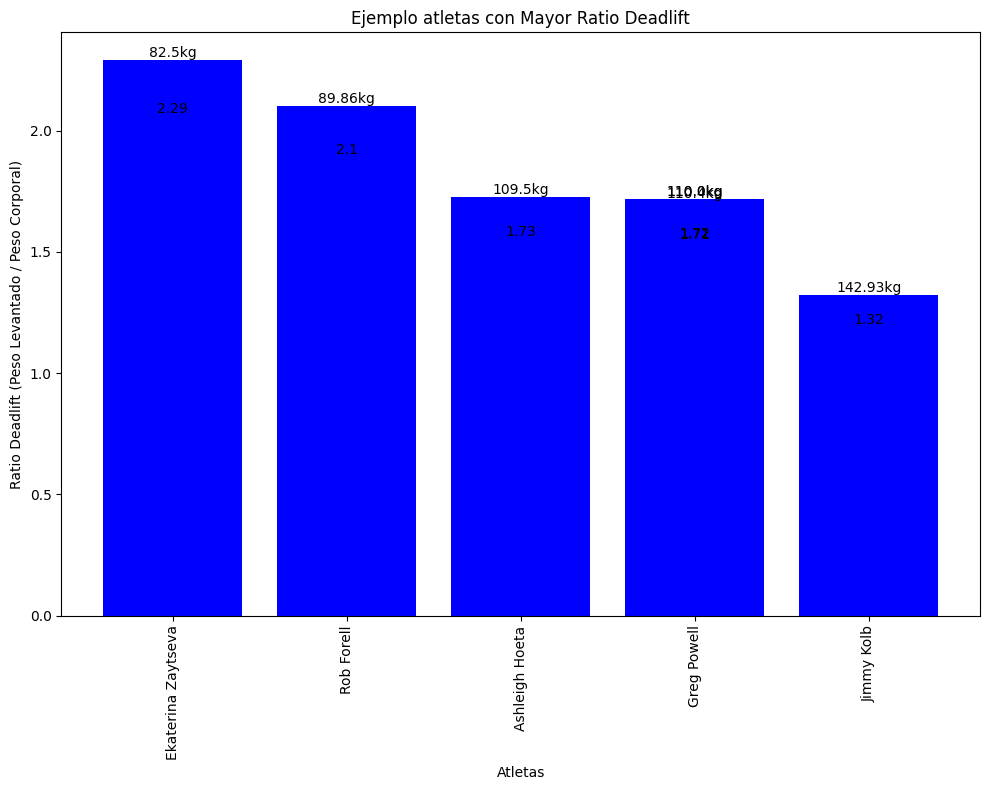

In [48]:
top_10_ratios = top_10_goodlift.nlargest(7, 'Deadlift_BW_ratio') # Seleccionar los datos de los atletas con los ratios más altos

fig, ax = plt.subplots(figsize=(10, 8))


bars = ax.bar(top_10_ratios['Name'], top_10_ratios['Deadlift_BW_ratio'], color='blue')

ax.set_xlabel('Atletas')
ax.set_ylabel('Ratio Deadlift (Peso Levantado / Peso Corporal)')
ax.set_title('Ejemplo atletas con Mayor Ratio Deadlift')


for i, bar in enumerate(bars): # Mostrar el peso corporal y el ratio encima de cada barra
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{top_10_ratios['BodyweightKg'].iloc[i]}kg",
            ha='center', va='bottom')
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.1 * bar.get_height(),
            round(bar.get_height(), 2), ha='center', va='bottom')

# Ajustar diseño
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


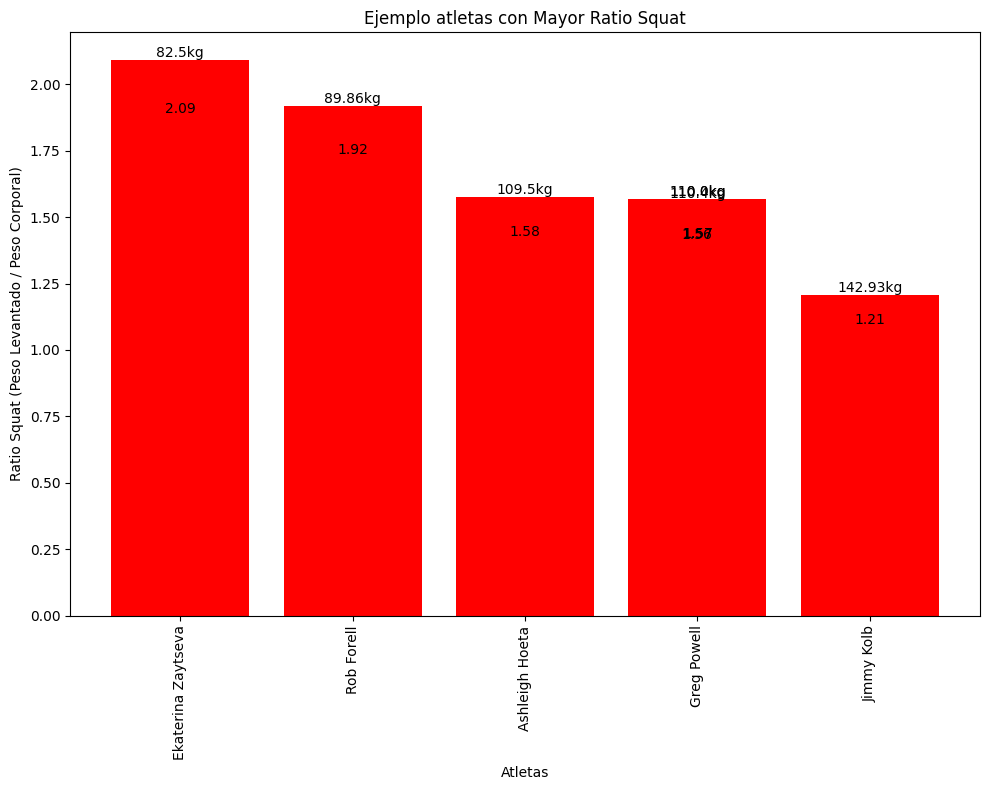

In [71]:
top_10_ratios = top_10_goodlift.nlargest(7, 'Squat_BW_ratio')


fig, ax = plt.subplots(figsize=(10, 8))

bars = ax.bar(top_10_ratios['Name'], top_10_ratios['Squat_BW_ratio'], color='red')


ax.set_xlabel('Atletas')
ax.set_ylabel('Ratio Squat (Peso Levantado / Peso Corporal)')
ax.set_title('Ejemplo atletas con Mayor Ratio Squat')

for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{top_10_ratios['BodyweightKg'].iloc[i]}kg",
            ha='center', va='bottom')
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.1 * bar.get_height(),
            round(bar.get_height(), 2), ha='center', va='bottom')
    

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

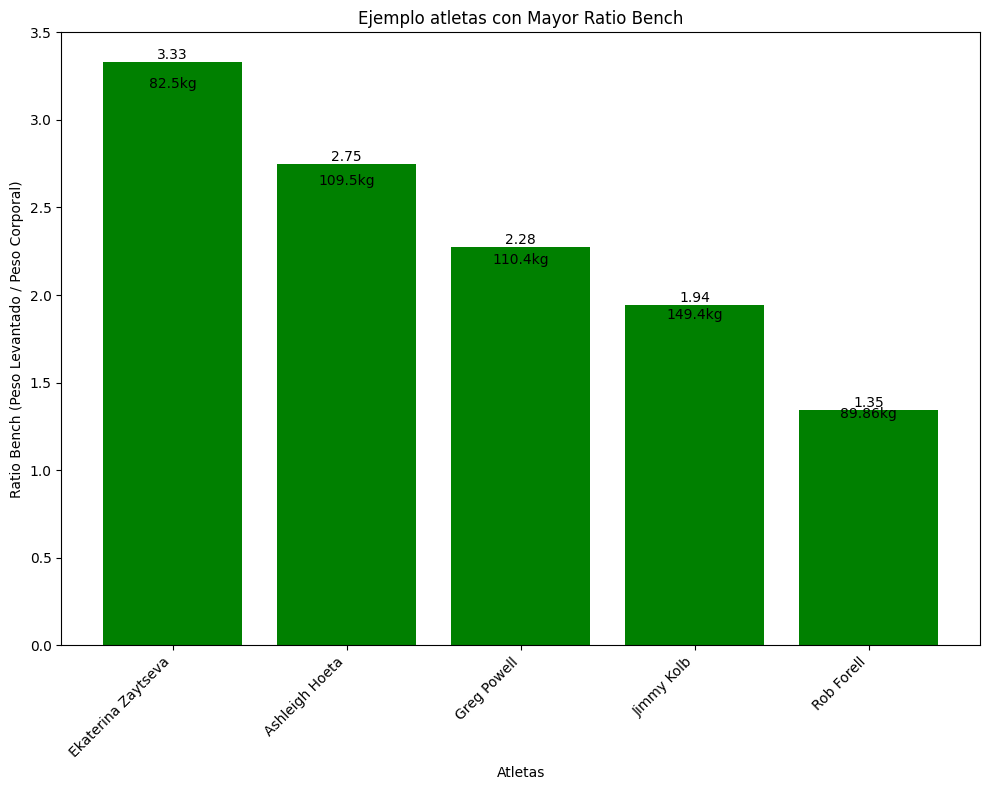

In [72]:
import matplotlib.pyplot as plt

# Quitar atletas duplicados
top_10_ratios_bench = top_10_goodlift.drop_duplicates(subset='Name').nlargest(7, 'Bench_BW_ratio')

fig, ax = plt.subplots(figsize=(10, 8))

bars_bench = ax.bar(top_10_ratios_bench['Name'], top_10_ratios_bench['Bench_BW_ratio'], color='green')

ax.set_xlabel('Atletas')
ax.set_ylabel('Ratio Bench (Peso Levantado / Peso Corporal)')
ax.set_title('Ejemplo atletas con Mayor Ratio Bench')

for i, bar in enumerate(bars_bench):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            round(bar.get_height(), 2), ha='center', va='bottom')
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05 * bar.get_height(),
            f"{top_10_ratios_bench['BodyweightKg'].iloc[i]}kg", ha='center', va='bottom')


# Ajustar diseño
plt.xticks(rotation=45, ha='right')  # Rotar y alinear el texto del eje x
plt.tight_layout()
plt.show()



Estas gráficas demuestran que por más kg no eres más fuerte en relación peso corporal. Por ejemplo Ekaterina Zaytseva es la que más ratio tiene.

---

### ¿En la categoría OPEN, Hay una mejora en marcas a lo largo de los años? 

C:\Users\enrik\AppData\Local\Temp\ipykernel_23824\3837237713.py:6: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  promedio_wilks_por_año = df_p.groupby('Year', 'Division' == 'Open')['Goodlift'].mean() # Calcular el promedio de Goodlift por añoa través de la media


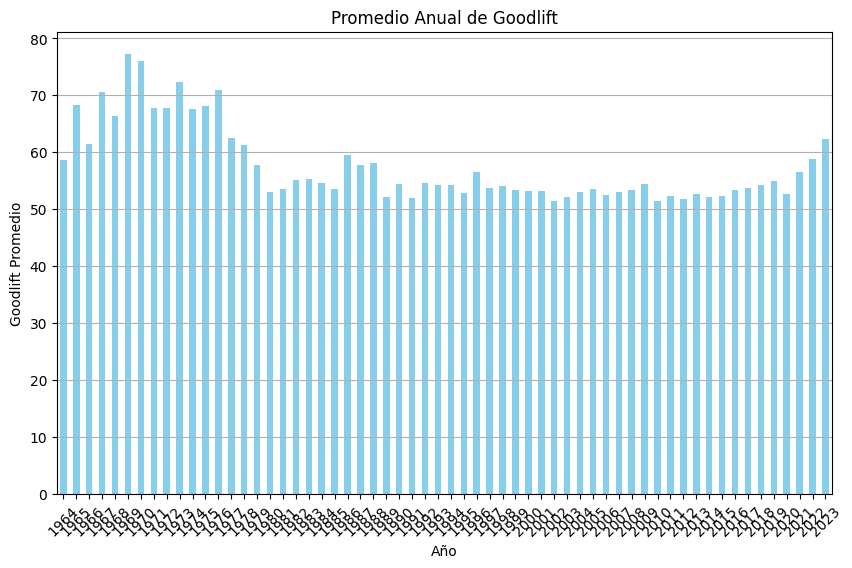

In [53]:
#Mirar si las media de las marcas han mejorado a medida que pasan los años. 

df_p['Year'] = df_p['Date'].dt.year # Extraemos el año de la columna 'Date'


promedio_wilks_por_año = df_p.groupby('Year', 'Division' == 'Open')['Goodlift'].mean() # Calcular el promedio de Goodlift por añoa través de la media


plt.figure(figsize=(10, 6))
promedio_wilks_por_año.plot(kind='bar', color='skyblue')
plt.xlabel('Año')
plt.ylabel('Goodlift Promedio')
plt.title('Promedio Anual de Goodlift')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [258]:
max_kg = df_p[df_p['TotalKg'] == df_p['TotalKg'].max()]

print(max_kg[['Name', 'TotalKg']]) 
# Mostrar la información del atleta con la máxima puntuación de Wilks

                 Name  TotalKg
1183050  Dave Hoff #1   1407.5


## ¿Hay una mejora en marcas a lo largo de los años? ¿A medida que pasan los años, los jóvenes destacan más con sus marcas?

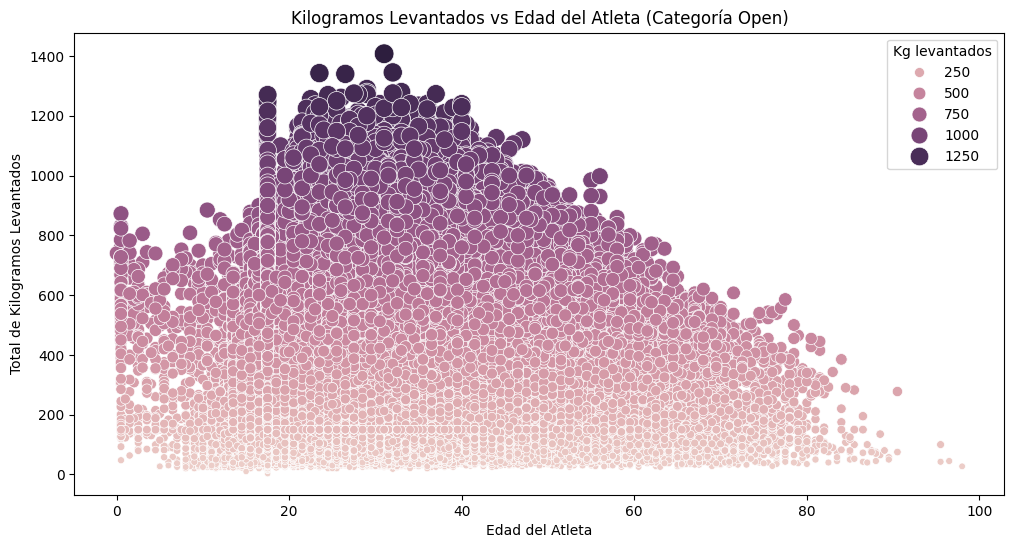

In [54]:
df_open = df_p[df_p['Division'] == 'Open'] #seleccionamos la categoría OPEN

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='TotalKg', data=df_open, hue='TotalKg', size='TotalKg', sizes=(20, 200))
plt.xlabel('Edad del Atleta')
plt.ylabel('Total de Kilogramos Levantados')
plt.title('Kilogramos Levantados vs Edad del Atleta (Categoría Open)')
plt.legend(title='Kg levantados')
plt.show()

Como vemos, hay un pico entre los 20 y los 40 años. Después los atletas empiezan a bajar mucho sus marcas.

***

Aquí intentaba ver información de los primeros atletas registrados(por curiosidad)

In [260]:
earliest_year_per_athlete = df_p.groupby('Name')['Year'].min()

# Ordena los atletas según el año más bajo registrado
earliest_year_per_athlete = earliest_year_per_athlete.sort_values()

# Muestra los atletas con los registros más antiguos
print(earliest_year_per_athlete.head(10))  # Muestra los 10 atletas con registros más antiguos

Name
Arpin                1964
Ed Morliens          1964
M. Dow               1964
Stanley Blinder      1964
B. Humble            1964
Robert Scott #3      1964
William Gladstone    1964
O'Murphy             1964
Vic Renalson         1964
Paul Majors          1964
Name: Year, dtype: int32
